In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import pickle

%matplotlib inline 

In [2]:
filepath = '../input/'
df = pd.read_csv('accepted_2007_to_2017Q3.csv.gz')


'''this is a dataset with rejected loans from lendingclub 
not using this one since I want to predict if a loan goes into default, 
which means it would have to have been accepted'''
#rej_df = pd.read_csv('rejected_2007_to_2017Q3.csv.gz')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (0,18,48,58,117,128,129,130,133,134,135,138,144,145,146) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


'this is a dataset with rejected loans from lendingclub \nnot using this one since I want to predict if a loan goes into default, \nwhich means it would have to have been accepted'

In [3]:
# this is how we can see how many entries are in the dataframe (df)
# it also works for numpy arrays
df.shape

(1646801, 150)

In [4]:
pd.options.display.max_rows

60

In [5]:
pd.options.display.max_rows = 1000

In [6]:
df.head().T

,0,1,2,3,4
id,38098114,36805548,37842129,37612354,37662224
member_id,NaN,NaN,NaN,NaN,NaN
loan_amnt,15000,10400,21425,12800,7650
funded_amnt,15000,10400,21425,12800,7650
funded_amnt_inv,15000,10400,21425,12800,7650
term,60 months,36 months,60 months,60 months,36 months
int_rate,12.39,6.99,15.59,17.14,13.66
installment,336.64,321.08,516.36,319.08,260.2
grade,C,A,D,D,C
sub_grade,C1,A3,D1,D4,C3


In [7]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1646801 entries, 0 to 1646800
Data columns (total 150 columns):
id                                            1646801 non-null object
member_id                                     0 non-null float64
loan_amnt                                     1646778 non-null float64
funded_amnt                                   1646778 non-null float64
funded_amnt_inv                               1646778 non-null float64
term                                          1646778 non-null object
int_rate                                      1646778 non-null float64
installment                                   1646778 non-null float64
grade                                         1646778 non-null object
sub_grade                                     1646778 non-null object
emp_title                                     1544337 non-null object
emp_length                                    1551580 non-null object
home_ownership                                

In [5]:
df.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Late (31-120 days)',
       'Late (16-30 days)', 'In Grace Period', 'Default', nan,
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [9]:
df.dti.unique()

array([12.03, 14.92, 18.49, ..., 66.95, 58.04, 87.11])

In [114]:
'''def lookup_description(col_name):
    return data_dict[col_name]

no_desc = []
for column in df.columns:
    try:
        print(column+":",lookup_description(column)," DataType:", df[column].dtype)
        print()
    except KeyError:
        no_desc.append(column)
        ''';

In [10]:
df['int_rate']

0          12.39
1           6.99
2          15.59
3          17.14
4          13.66
5          13.66
6          11.99
7          11.44
8          14.31
9          11.44
10         11.99
11         17.86
12         13.66
13         21.99
14         10.49
15         14.99
16         10.49
17         15.99
18         14.31
19         19.99
20         12.39
21         10.49
22         12.39
23         14.99
24         11.99
25         12.99
26          9.49
27         14.31
28         10.49
29         15.99
30         20.99
31         10.49
32          7.49
33         16.49
34         10.49
35         19.99
36          8.67
37         12.39
38          9.49
39         15.59
40         12.99
41         12.39
42         15.99
43         13.66
44         14.31
45         14.31
46          8.19
47         10.49
48         11.99
49          9.49
50         12.99
51         17.14
52          6.99
53         16.49
54         14.31
55         11.44
56         11.99
57         11.44
58         17.

In [11]:
df[df['int_rate'] > 20]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
13,37712169,NaN,21075.0,21075.0,21075.0,60 months,21.99,581.95,E,E5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
30,37622029,NaN,15000.0,15000.0,15000.0,60 months,20.99,405.72,E,E4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
66,37831998,NaN,8750.0,8750.0,8750.0,36 months,21.99,334.13,E,E5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
71,37802030,NaN,27525.0,27525.0,27525.0,60 months,22.99,775.79,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
89,37671926,NaN,19200.0,19200.0,19200.0,60 months,20.99,519.32,E,E4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
115,37782025,NaN,16950.0,16950.0,16950.0,60 months,25.83,505.79,G,G2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
138,37631842,NaN,27200.0,27200.0,27200.0,60 months,25.80,811.17,G,G1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
139,37681636,NaN,22400.0,22400.0,22400.0,60 months,24.50,650.92,F,F3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
152,37651796,NaN,10200.0,10200.0,10200.0,60 months,23.99,293.38,F,F2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
187,37611926,NaN,33950.0,33950.0,33950.0,36 months,23.99,1331.78,F,F2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df['int_rate'].mean()

13.21857148921261

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
member_id,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_amnt,1646778.0,14733.314782,8803.698067,5.000000e+02,8000.0000,12600.000,20000.000000,4.000000e+04
funded_amnt,1646778.0,14726.084102,8800.813440,5.000000e+02,8000.0000,12600.000,20000.000000,4.000000e+04
funded_amnt_inv,1646778.0,14702.443970,8805.917478,0.000000e+00,8000.0000,12500.000,20000.000000,4.000000e+04
int_rate,1646778.0,13.218571,4.704294,5.320000e+00,9.7600,12.740,15.990000,3.099000e+01
installment,1646778.0,439.412219,259.225570,4.930000e+00,251.7700,377.040,580.340000,1.719830e+03
annual_inc,1646774.0,77304.834579,120727.591570,0.000000e+00,46000.0000,65000.000,92000.000000,1.100000e+08
dti,1646421.0,18.524728,10.984222,-1.000000e+00,12.0700,17.890,24.320000,9.990000e+02
delinq_2yrs,1646749.0,0.334431,0.904876,0.000000e+00,0.0000,0.000,0.000000,4.200000e+01
fico_range_low,1646778.0,695.706829,31.302541,6.100000e+02,670.0000,690.000,710.000000,8.450000e+02


In [15]:
df[df['int_rate'] > 20]['int_rate'].mean()

23.7358636125938

In [16]:
df['grade'].unique()

array(['C', 'A', 'D', 'B', 'E', 'F', 'G', nan], dtype=object)

In [17]:
df[df['grade'] == 'A'].describe().T

,count,mean,std,min,25%,50%,75%,max
member_id,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_amnt,272724.0,14030.661585,8186.801228,5.000000e+02,8000.000000,12000.000000,20000.000000,4.000000e+04
funded_amnt,272724.0,14022.182041,8187.787355,5.000000e+02,8000.000000,12000.000000,20000.000000,4.000000e+04
funded_amnt_inv,272724.0,14006.899165,8191.800454,0.000000e+00,8000.000000,12000.000000,20000.000000,4.000000e+04
int_rate,272724.0,7.098492,1.011159,5.320000e+00,6.490000,7.260000,7.890000,9.630000e+00
installment,272724.0,425.262857,249.145658,1.567000e+01,240.920000,368.450000,590.430000,1.264380e+03
annual_inc,272720.0,90733.013340,90056.416478,0.000000e+00,55000.000000,75000.000000,107000.000000,9.573072e+06
dti,272697.0,15.858159,8.634330,0.000000e+00,10.230000,15.240000,20.960000,9.990000e+02
delinq_2yrs,272713.0,0.206572,0.662878,0.000000e+00,0.000000,0.000000,0.000000,2.000000e+01
fico_range_low,272724.0,726.802922,36.117058,6.600000e+02,700.000000,720.000000,750.000000,8.450000e+02


In [18]:
# looking at only defaulted loans:
default_categories = ['Default', 'Charged Off', 'Does not meet the credit policy. Status:Charged Off']
# .isin() is a trick for checking if something is in a list
# it's a pandas-specific function
df[df['loan_status'].isin(default_categories)].describe().T
# check out the average interest rate and dti (debt-to-income)


,count,mean,std,min,25%,50%,75%,max
member_id,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_amnt,168915.0,15358.896930,8607.118701,5.000000e+02,8950.0000,14000.0000,20000.0000,4.000000e+04
funded_amnt,168915.0,15344.927182,8601.226937,5.000000e+02,8925.0000,14000.0000,20000.0000,4.000000e+04
funded_amnt_inv,168915.0,15291.741704,8619.778019,0.000000e+00,8800.0000,14000.0000,20000.0000,4.000000e+04
int_rate,168915.0,15.730959,4.619251,5.320000e+00,12.5900,15.3100,18.5500,3.099000e+01
installment,168915.0,459.285084,255.352442,1.591000e+01,275.5700,401.3900,595.0300,1.569110e+03
annual_inc,168915.0,69257.905242,65502.023227,0.000000e+00,42703.0000,60000.0000,82129.5000,8.900060e+06
dti,168909.0,19.980065,8.991442,0.000000e+00,13.6200,19.7500,26.1800,9.990000e+02
delinq_2yrs,168912.0,0.342433,0.924026,0.000000e+00,0.0000,0.0000,0.0000,2.700000e+01
fico_range_low,168915.0,686.995530,25.093557,6.150000e+02,670.0000,680.0000,700.0000,8.450000e+02


In [123]:
def reject_outliers(sr, iq_range=0.5, side='left', return_mask=False):
    pcnt = (1 - iq_range) / 2
    qlow, median, qhigh = sr.dropna().quantile([pcnt, 0.50, 1-pcnt])
    iqr = qhigh - qlow
    if side=='both':
        mask = (sr - median).abs() <= iqr
    elif side=='left':
        mask = (sr - median) <= iqr
    elif side=='right':
        mask = (sr - median) >= iqr
    else:
        print('options for side are left, right, or both')
    
    if return_mask:
        return mask
    
    return sr[mask]

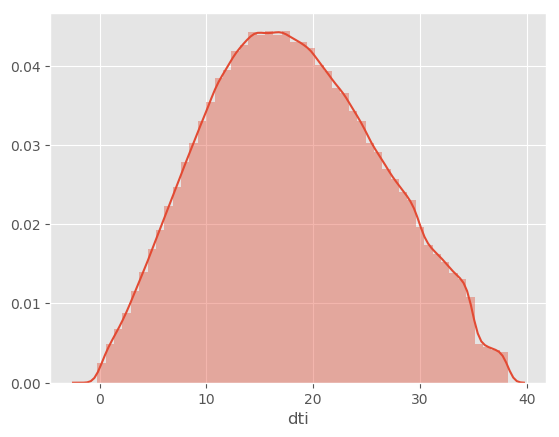

In [124]:
dti_no_outliers = reject_outliers(df['dti'], iq_range=0.75) # arrived at 0.85 via trial and error
f = sns.distplot(dti_no_outliers)
# other types of plot examples:
# http://seaborn.pydata.org/examples/

In [125]:
plt.xkcd()

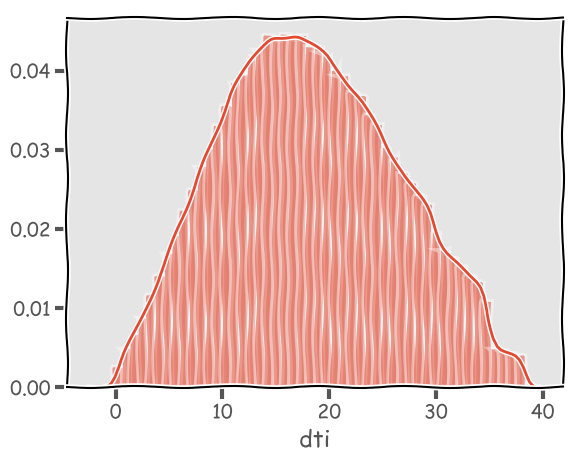

In [126]:
f = sns.distplot(dti_no_outliers)

In [127]:
# back to default
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

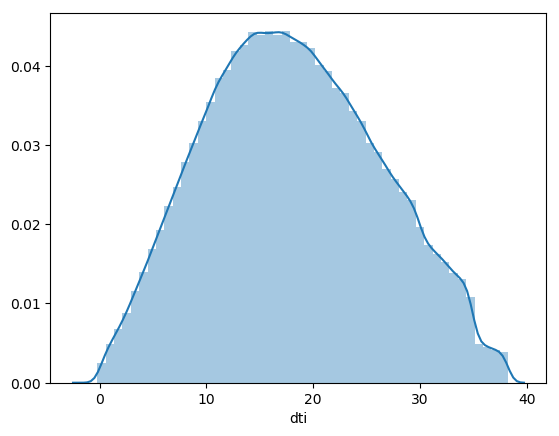

In [128]:
f = sns.distplot(dti_no_outliers)

In [129]:
plt.style.use('ggplot')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


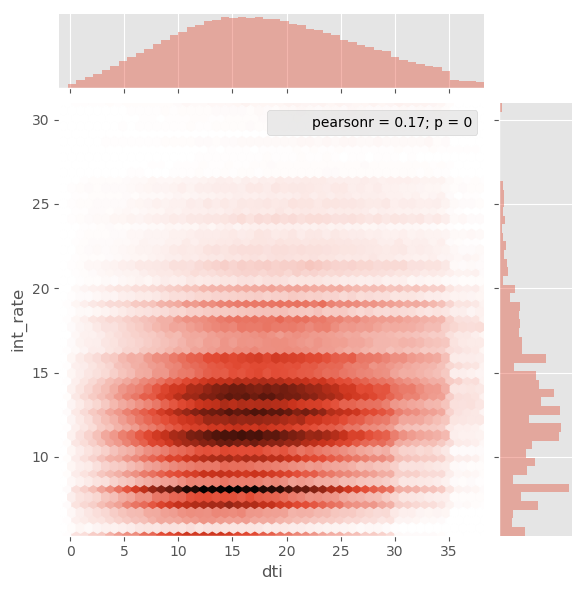

In [130]:
mask = reject_outliers(df['dti'], iq_range=0.75, return_mask=True)
f = sns.jointplot(data=df.ix[mask, :], x='dti', y='int_rate', kind='hex', joint_kws=dict(gridsize=50))

In [19]:
df.shape

(1646801, 150)

In [6]:
mask = df['loan_status'] != "Fully Paid"
rows_to_change = df[mask]
rows_to_change.loc[:, 'loan_status'] = 'Late'
df.update(rows_to_change)

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [7]:
df.loan_status.unique()

array(['Fully Paid', 'Late'], dtype=object)

In [8]:
df.to_pickle('df1.pkl')

In [2]:
import pickle
def unpickle_object(pkl):
    return pickle.load(open(pkl, 'rb'))

In [ ]:
df = unpickle_object("df1.pkl")

In [11]:
data_dict = unpickle_object("data_dict.pkl")

In [17]:
data_dict.head(151)

,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
0,acc_open_past_24mths,Number of trades opened in past 24 months.
1,addr_state,The state provided by the borrower in the loan...
2,all_util,Balance to credit limit on all trades
3,annual_inc,The self-reported annual income provided by th...
4,annual_inc_joint,The combined self-reported annual income provi...
5,application_type,Indicates whether the loan is an individual ap...
6,avg_cur_bal,Average current balance of all accounts
7,bc_open_to_buy,Total open to buy on revolving bankcards
8,bc_util,Ratio of total current balance to high credit/...
9,chargeoff_within_12_mths,Number of charge-offs within 12 months


In [20]:
'''def lookup_description(col_name):
    return data_dict[col_name]''';

In [21]:
'''no_desc = []
for column in df.columns:
    try:
        print(column+":",lookup_description(column)," DataType:", df[column].dtype)
        print()
    except KeyError:
        no_desc.append(column)''';

In [6]:
df.head().T

,0,1,2,3,4
id,38098114,36805548,37842129,37612354,37662224
member_id,NaN,NaN,NaN,NaN,NaN
loan_amnt,15000,10400,21425,12800,7650
funded_amnt,15000,10400,21425,12800,7650
funded_amnt_inv,15000,10400,21425,12800,7650
term,60 months,36 months,60 months,60 months,36 months
int_rate,12.39,6.99,15.59,17.14,13.66
installment,336.64,321.08,516.36,319.08,260.2
grade,C,A,D,D,C
sub_grade,C1,A3,D1,D4,C3


In [10]:
df['verification_status_joint'].unique()

array([nan, 'Not Verified', 'Verified', 'Source Verified'], dtype=object)

In [9]:
df['total_rev_hi_lim'].unique()

array([184500.,  19400.,  21500., ...,  70595.,  63390., 352765.])

In [7]:
df['verification_status_joint'].dtype

dtype('O')

In [8]:
df['total_rev_hi_lim'].dtype

dtype('float64')

In [16]:
df["policy_code"] = df["policy_code"].astype('object')

In [12]:
drop_col = ['initial_list_status', 'earliest_cr_line', 'mths_since_rcnt_il', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'policy_code', 'purpose', 'zip_code', "id", "member_id", "emp_title","desc","title","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", 'debt_settlement_flag_date', 'settlement_date', 'payment_plan_start_date', 'addr_state', 'open_rv_12m', 'open_rv_24m', "collection_recovery_fee","last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d", "last_credit_pull_d", "collections_12_mths_ex_med","mths_since_last_major_derog", "all_util", 'issue_d', 'home_ownership', 'emp_length', 'hardship_reason', 'hardship_start_date', 'hardship_end_date', 'settlement_status', 'settlement_amount', 'settlement_percentage', 'settlement_term', 'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'sec_app_mths_since_last_major_derog']

In [13]:
df.drop(drop_col, axis=1, inplace=True)

In [14]:
df.shape

(1646801, 99)

In [17]:
df['total_rev_hi_lim'].dtype

dtype('float64')

In [18]:
df['pct_tl_nvr_dlq'] = df['pct_tl_nvr_dlq'].apply(lambda x: x/100)
df['percent_bc_gt_75'] = df['percent_bc_gt_75'].apply(lambda x: x/100)

In [19]:
object_columns = df.select_dtypes(include=['object']).columns

for c in object_columns:
    df.loc[df[df[c].isnull()].index, c] = "missing"

In [20]:
obj_df = df.select_dtypes(include=['object'])

obj_df_cols = obj_df.columns

for col in obj_df_cols:
    df[col] = df[col].astype("category")
    
df.dtypes.unique()

array([dtype('float64'),
       CategoricalDtype(categories=[' 36 months', ' 60 months', 'missing'], ordered=False),
       CategoricalDtype(categories=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'missing'], ordered=False),
       CategoricalDtype(categories=['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
                  'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5',
                  'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5',
                  'G1', 'G2', 'G3', 'G4', 'G5', 'missing'],
                 ordered=False),
       CategoricalDtype(categories=['Not Verified', 'Source Verified', 'Verified', 'missing'], ordered=False),
       CategoricalDtype(categories=['Fully Paid', 'Late'], ordered=False),
       CategoricalDtype(categories=['missing', 'n', 'y'], ordered=False),
       CategoricalDtype(categories=['Individual', 'Joint App', 'missing'], ordered=False),
       CategoricalDtype(categories=['N', 'Y', 'missing'], ordered=False),
       Categor

In [21]:
unique_val_dict = {}
for col in df.columns:
    if col not in unique_val_dict:
        unique_val_dict[col] = df[col].unique()

In [22]:
df.head().T

,0,1,2,3,4
loan_amnt,15000,10400,21425,12800,7650
funded_amnt,15000,10400,21425,12800,7650
funded_amnt_inv,15000,10400,21425,12800,7650
term,60 months,36 months,60 months,60 months,36 months
int_rate,12.39,6.99,15.59,17.14,13.66
installment,336.64,321.08,516.36,319.08,260.2
grade,C,A,D,D,C
sub_grade,C1,A3,D1,D4,C3
annual_inc,78000,58000,63800,125000,50000
verification_status,Source Verified,Not Verified,Source Verified,Verified,Source Verified


In [25]:
category_columns = df.select_dtypes(include=['category']).columns
df = pd.get_dummies(df, columns=category_columns, drop_first=True)

In [26]:
df.shape

(1646801, 155)

In [27]:
float_columns = df.select_dtypes(include=['float64']).columns

for c in float_columns:
    df.loc[df[df[c].isnull()].index, c] = np.nan

In [2]:
def pickle_(obj, name):
    with open(name+".pkl", 'wb') as f:
        pickle.dump(obj, f, protocol=4)

In [95]:
pickle_(unique_val_dict_correction, "unique_values_for_columns")

In [28]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,...,hardship_status_missing,hardship_loan_status_In Grace Period,hardship_loan_status_Issued,hardship_loan_status_Late (16-30 days),hardship_loan_status_Late (31-120 days),hardship_loan_status_missing,disbursement_method_DirectPay,disbursement_method_missing,debt_settlement_flag_Y,debt_settlement_flag_missing
0,15000.0,15000.0,15000.0,12.39,336.64,78000.0,12.03,0.0,750.0,754.0,...,1,0,0,0,0,1,0,0,0,0
1,10400.0,10400.0,10400.0,6.99,321.08,58000.0,14.92,0.0,710.0,714.0,...,1,0,0,0,0,1,0,0,0,0
2,21425.0,21425.0,21425.0,15.59,516.36,63800.0,18.49,0.0,685.0,689.0,...,1,0,0,0,0,1,0,0,0,0
3,12800.0,12800.0,12800.0,17.14,319.08,125000.0,8.31,1.0,665.0,669.0,...,1,0,0,0,0,1,0,0,0,0
4,7650.0,7650.0,7650.0,13.66,260.20,50000.0,34.81,0.0,685.0,689.0,...,1,0,0,0,0,1,0,0,0,0


In [30]:
%matplotlib inline
import pickle
#%run helper_loans.py
pd.options.display.max_columns = 1000
plt.rcParams["figure.figsize"] = (15,10)
from datetime import datetime

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler

For those columns that relate to the months since something occured, I will impute based on human logic of the category.

Example:

Months since last deliquency, if NaN, then I will assume the individual has never been deliquent, thus I wil assign a value of 999.

If Number of charge-offs within 12 months is NaN - I will assume this individual has never had a charged off loan in the last year, thus I will impute with 0.

In [31]:
#this logic will be important for flask data entry.

float_columns = df.select_dtypes(include=['float64']).columns

for col in float_columns:
    if "mths" not in col:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        if col == "inq_last_6mths":
            df[col].fillna(0, inplace=True)
        elif col == "mths_since_last_delinq":
            df[col].fillna(999, inplace=True)
        elif col == "mths_since_last_record":
            df[col].fillna(999, inplace=True)
        elif col == "collections_12_mths_ex_med":
            df[col].fillna(0, inplace=True)
        elif col == "mths_since_last_major_derog":
            df[col].fillna(999, inplace=True)
        elif col == "mths_since_rcnt_il":
            df[col].fillna(999, inplace=True)
        elif col == "acc_open_past_24mths":
            df[col].fillna(0, inplace=True)
        elif col == "chargeoff_within_12_mths":
            df[col].fillna(0, inplace=True)
        elif col == "mths_since_recent_bc":
            df[col].fillna(999, inplace=True)
        elif col == "mths_since_recent_bc_dlq":
            df[col].fillna(999, inplace=True)
        elif col == "mths_since_recent_inq":
            df[col].fillna(999, inplace=True)
        elif col == "mths_since_recent_revol_delinq":
            df[col].fillna(999, inplace=True)

In [32]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1646801 entries, 0 to 1646800
Data columns (total 155 columns):
loan_amnt                                     1646801 non-null float64
funded_amnt                                   1646801 non-null float64
funded_amnt_inv                               1646801 non-null float64
int_rate                                      1646801 non-null float64
installment                                   1646801 non-null float64
annual_inc                                    1646801 non-null float64
dti                                           1646801 non-null float64
delinq_2yrs                                   1646801 non-null float64
fico_range_low                                1646801 non-null float64
fico_range_high                               1646801 non-null float64
inq_last_6mths                                1646801 non-null float64
mths_since_last_delinq                        1646801 non-null float64
mths_since_last_record            

In [33]:
df.to_csv('df_dummys2.csv')

In [ ]:
filepath = '../input/'
df = pd.read_csv('accepted_2007_to_2017Q3.csv.gz')

In [34]:
scaler = StandardScaler()
matrix_df = df.as_matrix()
matrix = scaler.fit_transform(matrix_df)
scaled_df = pd.DataFrame(matrix, columns=df.columns)


In [35]:
scaled_df.shape

(1646801, 155)

In [38]:
pickle_(df, "CLASSIFICATION DF")

In [39]:
pickle_(scaled_df, "GLM DATAFRAME")

In [5]:
df = unpickle_object("CLASSIFICATION DF.pkl")

In [57]:
df.loan_status_Late.unique()

array([0, 1], dtype=uint64)

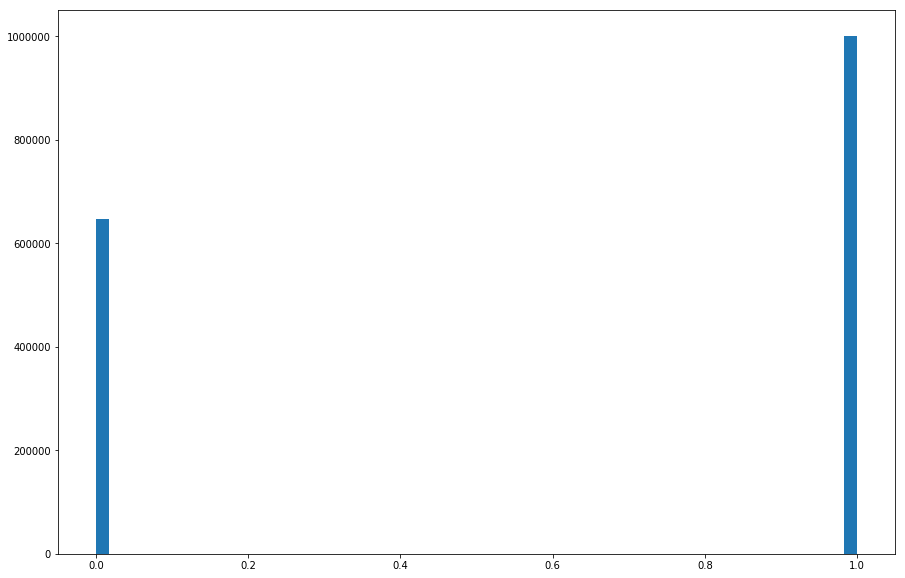

In [64]:
plt.hist(df.loan_status_Late, bins='auto');

In [ ]:
plt.hist(a, bins='auto')

In [68]:
df.mths_since_last_delinq

0          999.0
1           42.0
2           60.0
3           17.0
4          999.0
5          999.0
6           55.0
7           12.0
8            1.0
9          999.0
10         999.0
11          48.0
12          46.0
13          26.0
14           9.0
15         999.0
16          77.0
17           5.0
18         999.0
19         999.0
20         999.0
21         999.0
22         999.0
23          59.0
24          57.0
25         999.0
26         999.0
27         999.0
28          35.0
29          49.0
           ...  
1646771    999.0
1646772     41.0
1646773     58.0
1646774    999.0
1646775     10.0
1646776     66.0
1646777    999.0
1646778     35.0
1646779     68.0
1646780    999.0
1646781    999.0
1646782     10.0
1646783     26.0
1646784      9.0
1646785     24.0
1646786    999.0
1646787    999.0
1646788    999.0
1646789     51.0
1646790     34.0
1646791     32.0
1646792    999.0
1646793     71.0
1646794    999.0
1646795    999.0
1646796     48.0
1646797      8.0
1646798    999

# PSQL, I will of course practice this more & work on challenges

In [5]:
engine = create_engine(os.environ["PSQL_CONN"])

In [7]:
df.to_sql("df_dummys", con=engine)

BELOW WE DIRECTLY QUERY THE DATABASE BELOW: Nothing has to be held in memory again

In [10]:
pd.read_sql_query('''SELECT * FROM df_dummys LIMIT 5''', engine)

,index,int_rate,dti,term_ 60 months,bc_open_to_buy,revol_util,installment,avg_cur_bal,tot_hi_cred_lim,revol_bal,funded_amnt_inv,bc_util,tot_cur_bal,total_bc_limit,total_rev_hi_lim,funded_amnt,loan_amnt,mo_sin_old_rev_tl_op,total_bal_ex_mort,issue_d_Dec-2016,total_acc,mo_sin_old_il_acct,mths_since_recent_bc,total_il_high_credit_limit,inq_last_6mths,acc_open_past_24mths,mo_sin_rcnt_tl,mo_sin_rcnt_rev_tl_op,percent_bc_gt_75,num_rev_accts,mths_since_last_delinq,open_acc,mths_since_recent_inq,grade_B,num_bc_tl,loan_status_Late
0,0,-0.691239,0.316533,-0.572832,-0.336618,1.217037,-1.076647,-0.344728,-0.323194,-0.107344,-1.088801,0.149284,-0.354923,-0.290113,-0.215951,-1.095558,-1.096804,-0.173567,-0.242634,-0.113402,-1.373327,0.046177,2.9681,-0.221848,0.195522,-1.305392,-0.292118,-0.277218,0.028544,-0.135032,0.951804,-1.611450,2.180953,1.584982,-0.114309,-0.598253
1,1,0.332064,-0.526679,1.745714,-0.336618,-1.824751,-1.484993,-0.344728,-0.323194,-0.669430,-1.382859,0.149284,-0.354923,-0.290113,-0.215951,-1.393251,-1.394124,-0.173567,-0.242634,-0.113402,-1.792454,0.046177,2.9681,-0.221848,3.933241,-1.305392,-0.292118,-0.277218,0.028544,-0.135032,0.951804,-1.611450,2.180953,-0.630922,-0.114309,1.671534
2,2,0.484895,-0.282416,-0.572832,-0.336618,1.822939,-1.387900,-0.344728,-0.323194,-0.609796,-1.394741,0.149284,-0.354923,-0.290113,-0.215951,-1.405159,-1.406017,-0.173567,-0.242634,-0.113402,-1.289501,0.046177,2.9681,-0.221848,1.129952,-1.305392,-0.292118,-0.277218,0.028544,-0.135032,0.951804,-1.804259,2.180953,-0.630922,-0.114309,-0.598253
3,3,-0.062196,0.074485,-0.572832,-0.336618,-1.349855,-0.377418,-0.344728,-0.323194,-0.485640,-0.491774,0.149284,-0.354923,-0.290113,-0.215951,-0.500173,-0.502163,-0.173567,-0.242634,-0.113402,0.973787,0.046177,2.9681,-0.221848,0.195522,-1.305392,-0.292118,-0.277218,0.028544,-0.135032,-1.048563,-0.261787,2.180953,-0.630922,-0.114309,-0.598253
4,4,-0.239391,0.009306,1.745714,-0.336618,-0.002953,-1.453448,-0.344728,-0.323194,0.556906,-1.323454,0.149284,-0.354923,-0.290113,-0.215951,-1.333712,-1.334660,-0.173567,-0.242634,-0.113402,1.057612,0.046177,2.9681,-0.221848,-0.738908,-1.305392,-0.292118,-0.277218,0.028544,-0.135032,-1.042337,0.702258,2.180953,1.584982,-0.114309,-0.598253
